In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import seaborn as sns 

import re 
from collections import Counter
from wordcloud import WordCloud 

from sklearn.model_selection import train_test_split 

#plt.rcParams["font.family"]="bn" 
#plt.rcParams['font.family'] = ['sans-serif']
#plt.rcParams['font.sans-serif'] = ['SimHei']
import warnings 
warnings.filterwarnings('ignore')

# 1. Reading Dataset 

In [6]:
train = pd.read_csv("/content/drive/MyDrive/technometrics/train.csv")  
test = pd.read_csv("/content/drive/MyDrive/technometrics/test.csv")  

# 2. Overview of the dataset

In [7]:
train.head()

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...


In [8]:
test.head() 

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...


# 3. Data Preprocessing 

In [9]:
# Selecting only necessary columns(I am not going to select cleanText because I will clean)
train = train.loc[:,['text', 'category']]
test = test.loc[:, ['text', 'category']] 

In [10]:
print("Shape of train is :", train.shape)
print("Shape of test is :", test.shape) 

Shape of train is : (98883, 2)
Shape of test is : (98884, 2)


In [11]:
print("Checking number of null value for train data :", train.isnull().sum())
print("Checking number of null value for test data :", test.isnull().sum()) 

Checking number of null value for train data : text        0
category    0
dtype: int64
Checking number of null value for test data : text        0
category    0
dtype: int64


In [12]:
print("Checking number of duploicated data for train dataset :", train.duplicated().sum())
print("Checking number of duplicated data for test dataset :", test.duplicated().sum()) 

Checking number of duploicated data for train dataset : 457
Checking number of duplicated data for test dataset : 498


In [13]:
# Dropping duplicated data from both train and test dataset 
train.drop_duplicates(inplace=True) 
test.drop_duplicates(inplace=True) 

# Sample of the Dataset

##### Due to GPU shortage I am going to use sample of the train and test dataset. 

In [14]:
train, unnecessary = train_test_split(train, test_size=.7, stratify=train['category']) 
test, unnecessary = train_test_split(test, test_size=.7, stratify=test['category']) 
print("Shape of train is :{} \nShape of test is :{}".format(train.shape, test.shape)) 

Shape of train is :(29527, 2) 
Shape of test is :(29515, 2)


# 4. Dataset Cleaning

### 4.1 Some Statistics for cleaning

In [15]:
# Average word in train and test content
train_word_average = np.mean(train['text'].apply(lambda x: len(x.split())))
test_word_average = np.mean(test['text'].apply(lambda x: len(x.split())))
print("Average word in train is {} Average word in test is {}".format(train_word_average, test_word_average))

# Minimum word in train and test content 
train_word_minimum = np.min(train['text'].apply(lambda x: len(x.split())))
test_word_minimum = np.min(test['text'].apply(lambda x: len(x.split())))
print("Minimum word in train is {} Minimum word in test is {}".format(train_word_minimum, test_word_minimum))


# Maximum word in train and test content
train_word_maximum = np.max(train['text'].apply(lambda x: len(x.split())))
test_word_maximum = np.max(test['text'].apply(lambda x: len(x.split())))
print("Maximum word in train is {} Maximum word in test is {}".format(train_word_maximum, test_word_maximum))


Average word in train is 263.7533782639618 Average word in test is 261.5027274267322
Minimum word in train is 1 Minimum word in test is 2
Maximum word in train is 3987 Maximum word in test is 5263


### 4.2 Taking rows > 100 words and <500 words

In [16]:
# Taking those rows where have > 100 words 
train = train[train['text'].apply(lambda x: len(x.split()) > 100 )].reset_index(drop=True) 
test = test[test['text'].apply(lambda x:  len(x.split()) > 100 )].reset_index(drop=True) 


# Taking those rows where have < 500 words 
train = train[train['text'].apply(lambda x: len(x.split()) < 500)].reset_index(drop=True) 
test = test[test['text'].apply(lambda x: len(x.split()) < 500)].reset_index(drop=True) 
print("Shape of train is {} shape of test is {}".format(train.shape, test.shape))

Shape of train is (21891, 2) shape of test is (21975, 2)


### 4.3 Removing stopwords

In [17]:
# Loading bengali stop words file
with open('/content/drive/MyDrive/technometrics/stopwords-bn.txt', 'r', encoding='utf-8-sig') as f:
    stop_word = f.read()
    stop_word = stop_word.replace(" ", "")
    stop_word = stop_word.split('\n')
    print(stop_word)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

### 4.4 Unnecessary Character Cleaning 

In [18]:
def clean_text(text):
    row = str(text)
    row = row.replace('\n', ' ')
    row = row.replace('\t', ' ')
    row = row.replace('\\', "")
    row = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', row)
    row = re.sub(' +', ' ', row)
    row = row.replace("।", "")
    row = re.sub('[১২৩৪৫৬৭৮৯০]', '', row)
    row = re.sub('[1234567890]', '', row) 
    row = row.replace('’', '')
    row = row.replace('‘', '')
    
    # remove stopwords
    # Removing stop words
    row = row.split()
    row = [w for w in row if not w in stop_word]
    row = " ".join(row)
    return row

In [19]:
train['text'] = train['text'].apply(lambda x: clean_text(x)) 
test['text'] = test['text'].apply(lambda x: clean_text(x)) 
print("Shape of train is {} shape of test is {}".format(train.shape, test.shape))

Shape of train is (21891, 2) shape of test is (21975, 2)


In [20]:
# Minimum, Average, Maximum words after cleaning the both train test dataset
# Minimum word 
train_word_minimum = np.min(train['text'].apply(lambda x: len(x.split()))) 
test_word_minimum = np.min(test['text'].apply(lambda x: len(x.split()))) 
print("Minimum word in trian is {} Minimum word in test is {}".format(train_word_minimum, test_word_minimum))

# Average word 
train_word_average = np.mean(train['text'].apply(lambda x: len(x.split())))
test_word_average = np.mean(test['text'].apply(lambda x: len(x.split())))
print("Average word in train is {} Average word in test is {}".format(train_word_average, test_word_average))

# Maximum word 
train_word_maximum = np.max(train['text'].apply(lambda x: len(x.split()))) 
test_word_maximum = np.max(test['text'].apply(lambda x: len(x.split()))) 
print("Maximum word in trian is {} Maximum word in test is {}".format(train_word_maximum, test_word_maximum))


Minimum word in trian is 44 Minimum word in test is 51
Average word in train is 178.66237266456534 Average word in test is 178.13342434584754
Maximum word in trian is 484 Maximum word in test is 489


# 5 Shuffle train and test dataset and Resetting Index

In [21]:
# Shuffle and Resetting index for both train and test 
train.sample(frac=1).reset_index(drop=True, inplace=True) 
test.sample(frac=1).reset_index(drop=True, inplace=True)  

In [22]:
# Saving sample dataset for future use 
train.to_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv", index=False)  
test.to_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv", index=False) 

# 6 EDA(Exploratory Data Analysis)

In [23]:
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")
print("Shape of train is :{} \nShape of test is :{}".format(train.shape, test.shape)) 

Shape of train is :(21891, 2) 
Shape of test is :(21975, 2)


In [24]:
# Visualizing Some Text from train dataset 
for i in range(5): 
  print(train['category'][i])
  print(train['text'][i]) 

international
শখ শরীরে ট্যাটু আঁকা বারাক ওবামা রানি এলিজাবেথের ট্যাটু আঁকিয়েছেন একের এক রেকর্ড গড়ে গিনেসে বুকে নাম তুলেছেন রেকর্ডের ফেলেছেন দাঁতও পুরো মুখে স্ট্র জ্বলন্ত মোমবাতি ধরবেন বলেই বছর বয়সী ব্যক্তির নাম হর প্রকাশ ঋষি বাড়ি ভারতের নয়া দিল্লিতেযৌবন রেকর্ডের পেছনে ছুটতে হর প্রকাশ ঋষি নিজেকে গিনেস ঋষি পরিচয় দাবি টির রেকর্ড গড়েছেন সালে নয়া দিল্লির সিনেমা জন্ম হর প্রকাশ ঋষির পতাকাসহ শরীরে ট্যাটু বানিয়েছেন লক্ষ্য ট্যাটুকে রেকর্ড বুকে তুলবেন সালে বন্ধুকে একটানা ঘণ্টা স্কুটার চালিয়ে রেকর্ড গড়ে গিনেসে বুকে নাম তোলেন এরপর নাম রেকর্ড বুকে তোলার একের এক অদ্ভুত কীর্তি গড়ে চলেছেন নয়া দিল্লি পিৎজা ডেলিভারি সানফ্রান্সিসকোতে এক বোতল টমেটো কেচাপ খেয়ে রেকর্ড গড়েছিলেন মিনিটের কম সময়ে খেয়ে ফেলেছিলেনরেকর্ড গড়ার হর প্রকাশ ঋষির স্ত্রীও কম সালে স্ত্রী বিমলা বিশ্বের সবচেয়ে ছোট উইল লিখে গিনেস রেকর্ডসে নাম তোলেন উইলে লেখা তিনটি শব্দ অল টু সনরয়টার্স টিভিকে হর প্রকাশ ঋষি কোল্ড ড্রিংকসের স্ট্র একসঙ্গে মুখে নেওয়ার বিশ্বরেকর্ড রেকর্ড গড়ার মুখে জায়গা দরকার দাঁত ফেলেছি স্ট্র মুখে রেকর্ড গড়তে পারিএখন অদ্ভুত এক নেশা

In [25]:
# Visualizing Some Text from test dataset 
for i in range(5): 
  print(test['category'][i]) 
  print(test['text'][i]) 

sports
পিটার বিকাসাংজুয়ালা ভুল ফেলেছেন বড্ড ভুল ভুলের খেসারত বড় ভেবেছিল বিকাসাংজুয়ালা একটু ভিন্ন কায়দায় গোল উদযাপন চেয়েছিলেন খেসারত জীবন অভিনব পন্থায় গোল উদযাপন চোটাক্রান্ত ফুটবলারই মৃত্যুঘটনাটি ঘটেছে গত মঙ্গলবার ভারতের মিজোরাম প্রিমিয়ার লিগে বিকাসাংজুয়ালা খেলেন বেথেলহাম ভেংথালাংয়ে চানমারি ওয়েস্টের বিপক্ষে ম্যাচের মিনিটে দারুণ এক গোলে দলকে সমতায় ফিরিয়ে ছুটলেন গোল উদযাপন উদযাপনটা অনেকটা জার্মান তারকা মিরোস্লাভ ক্লোসার ডিগবাজিটা ঠিকঠাক দ্বিতীয় ডিগবাজির সময় ভূমিতে পা পড়ল মাথা মারাত্মক আঘাত পেলেন মেরুদণ্ডে দ্রুতই হাসপাতালে মারা গেলেন বছর বয়সী মিডফিল্ডার মারা চোখজোড়া দান গেছেন তরুণ ফুটবলারমিজোরাম রাজ্যের একজন ফুটবলকর্তা পিটার খুবই প্রতিভাবান খেলোয়াড় স্বপ্ন দেখত জাতীয় লিগ খেলবে মৃত্যুতে শোকাহাত ভেবেছিলাম সেরে উঠবে সূত্র এএফপি
education
অধ্যায়প্রিয় শিক্ষার্থী বাংলাদেশ বিশ্বপরিচয়ের অধ্যায় সঠিক উত্তরটি লেখো প্রশ্ন প্রতিটি প্রশ্নের মান প্রশ্ন সঠিক উত্তরটি উত্তরপত্রে লেখো জনগণের শাসন বোঝোক রাজতন্ত্র খ সমাজতন্ত্রগ গণতন্ত্র ঘ পরিবারতন্ত্রউত্তর গ গণতন্ত্র গণতন্ত্র কাদের মত অনুসর

In [27]:
train['category'].value_counts()

international    3682
sports           3538
entertainment    3533
state            3309
economy          2749
education        2656
technology       2424
Name: category, dtype: int64

In [28]:
test['category'].value_counts() 

sports           3615
entertainment    3594
international    3590
state            3283
economy          2816
education        2686
technology       2391
Name: category, dtype: int64

### 6.1 Balance, Imbalance Check 

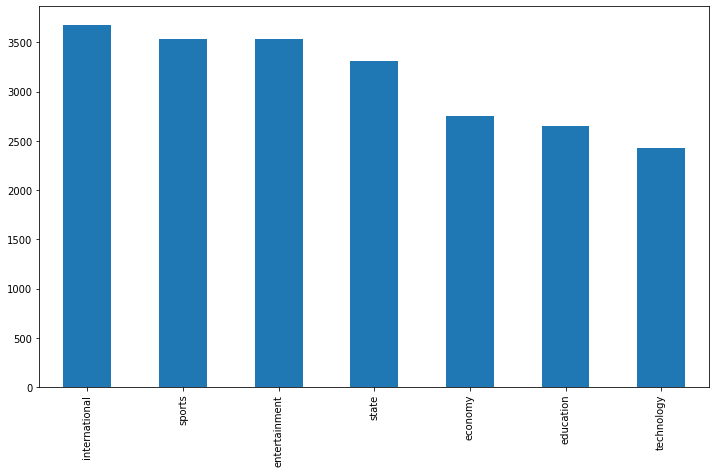

In [29]:
plt.figure(figsize=(12, 7)) 

# v_c = train['category'].value_counts()
# sns.barplot(v_c.index[1:], v_c.values[1:]) 
train['category'].value_counts().plot(kind='bar') 

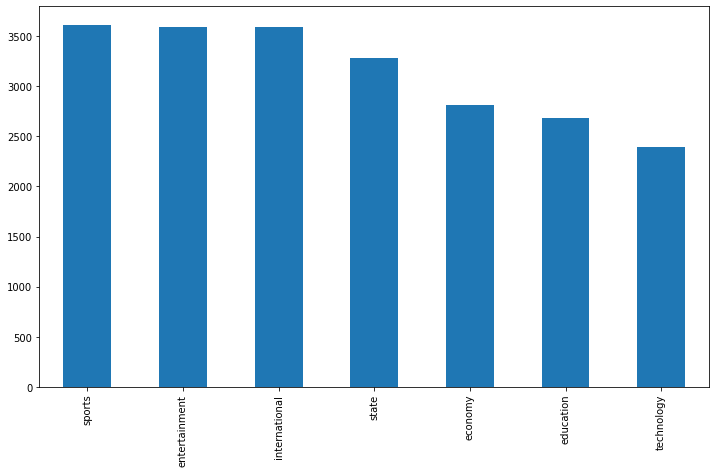

In [30]:
plt.figure(figsize=(12, 7)) 
test['category'].value_counts().plot(kind='bar') 

### 6.2 Most Common Words

In [34]:
pip install python-bidi

In [36]:
from bidi.algorithm import get_display

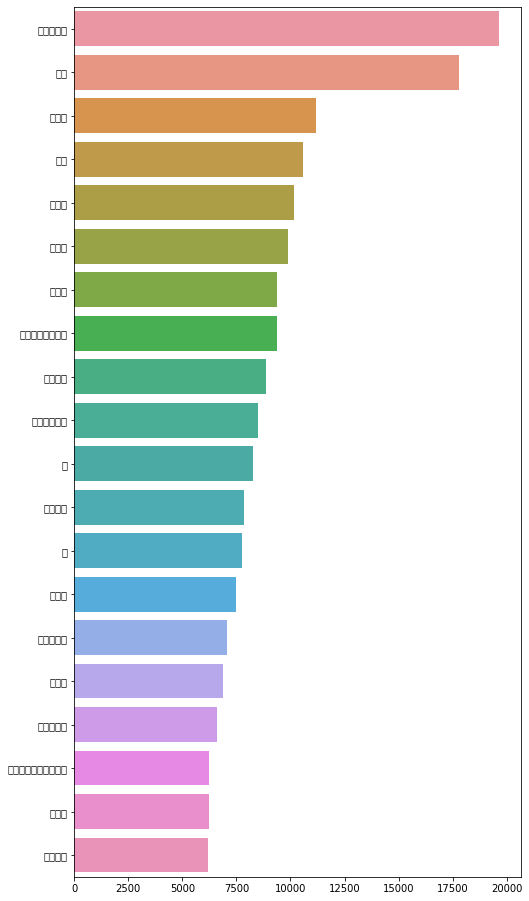

In [41]:
prop = fm.FontProperties(fname='kalpurush.ttf') 

# For train dataset 
results = Counter(" ".join(train['text'].values.tolist()).split(" ")).items()
results_sorted = sorted(results, key = lambda x: x[1], reverse=True)  

x = [] 
y = [] 
for t in range(0, 20): 
  #print(results_sorted[t])
  x.append(results_sorted[t][0])
  y.append(results_sorted[t][1])

#prop = fm.FontProperties(fname='kalpurush.ttf')
#plt.figure(figsize=(8, 16))

plt.figure(figsize=(8, 16))
sns.barplot(x=y, y=x)

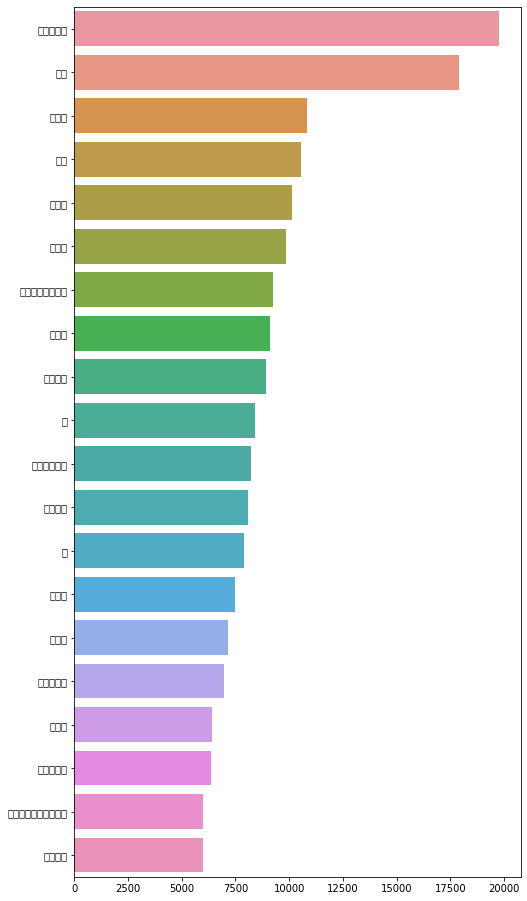

In [ ]:
# For test dataset 
results = Counter(" ".join(test['text'].values.tolist()).split(" ")).items()
results_sorted = sorted(results, key = lambda x: x[1], reverse=True)  

x = [] 
y = [] 
for t in range(0, 20): 
  #print(results_sorted[t])
  x.append(results_sorted[t][0])
  y.append(results_sorted[t][1])

plt.figure(figsize=(8, 16))
sns.barplot(x=y, y=x)

### 6.3 Word Cloud 

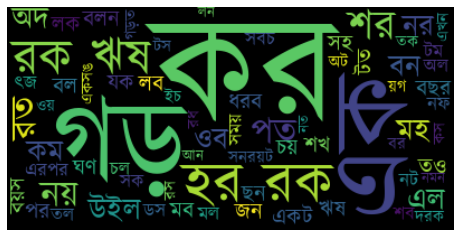

In [39]:
prop = fm.FontProperties(fname='kalpurush.ttf') 

# First row from train dataset 
train_text = train['text'][0]

# defining word cloud 
wordcloud = WordCloud(font_path="/content/drive/MyDrive/technometrics/kalpurush.ttf").generate(train_text) 

# visualizing word cloud 
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show() 

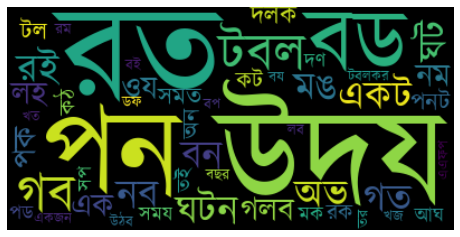

In [40]:
# First row from train dataset 
test_text = test['text'][0]

# defining word cloud 
wordcloud = WordCloud(font_path="/content/drive/MyDrive/technometrics/kalpurush.ttf").generate(test_text) 

# visualizing word cloud 
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show() 

# 7. Text Classification Using Machine Learning

### 7.1 Using Bag-of-Words with CountVectorizer

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Reading Preprocessed train and test dataset 
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")

# Taking sample of the train and test dataset 
train, unnecessary_train = train_test_split(train, test_size=.7, stratify=train['category']) 
test, unnecessary_test = train_test_split(test, test_size=.7, stratify=test['category']) 

# Joining train and test dataset 
data = pd.concat([train, test], axis=0, ignore_index=True) 

# Again dividing data into train and test 
#train, test = train_test_split(data, test_size=.05, stratify=data['category']) 
#print("Shape of train :{} \nShape of test :{}".format(train.shape, test.shape)) 

# Shuffle and Resetting index for both train and test 
#train = train.sample(frac=1).reset_index(drop=True) 
#test = test.sample(frac=1).reset_index(drop=True) 
data = data.sample(frac=1).reset_index(drop=True) 

print("Shape of data is :{}".format(data.shape)) 
data.head()

Shape of data is :(13115, 2)


,text,category
0,আগামীকাল শুক্রবার সাপ্তাহিক বন্ধের দেশের বাণিজ...,economy
1,বাড়ি নির্মাণে টাকা ঋণ দেবে রাষ্ট্রীয় সংস্থা বা...,economy
2,লয়ে যাও আমায় শিরোনামে কুষ্টিয়ার ছেঁউড়িয়ায় লালন...,entertainment
3,মার্কিন গোয়েন্দাদের নিরপরাধ ব্রিটিশ নাগরিকদের ...,international
4,ঈদুল আজহার ছুটির বাজার জমে উঠতে ঈদুল আজহার কেজ...,economy


In [ ]:
X = data['text'] 
y = data['category'] 

In [ ]:
le = LabelEncoder() 
y = le.fit_transform(y) 

In [ ]:
count_vectorizer = CountVectorizer() 
X = count_vectorizer.fit_transform(X).toarray() 
X.shape 

(13115, 27243)

In [ ]:
train_x, x_valid, train_y, y_valid = train_test_split(X, y, test_size=.05, stratify=y) 
print("Shape of x_train: {} \nShape of x_test: {} \nShape of y_train: {} \nShape of y_test: {}".format(train_x.shape, x_valid.shape, train_y.shape, y_valid.shape))

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=.05, stratify=train_y)
print("Shape of x_train is :{} \nShape of x_test is :{} \nShape of y_train is :{} \nShape of y_test is :{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Shape of x_train: (12459, 27243) 
Shape of x_test: (656, 27243) 
Shape of y_train: (12459,) 
Shape of y_test: (656,)
Shape of x_train is :(11836, 27243) 
Shape of x_test is :(623, 27243) 
Shape of y_train is :(11836,) 
Shape of y_test is :(623,)


In [ ]:
model_mnb = MultinomialNB() 
model_mnb.fit(x_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = model_mnb.predict(x_valid) 

In [ ]:
ac = accuracy_score(y_valid, y_pred)
print("Accuracy Score is: {}".format(ac))

Accuracy Score is: 0.8475609756097561


In [ ]:
# Classification Report  
print(classification_report(y_valid, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        84
           1       0.98      0.57      0.72        80
           2       0.86      0.95      0.90       105
           3       0.83      0.84      0.84       108
           4       0.92      0.90      0.91       107
           5       0.76      0.91      0.83        99
           6       0.80      0.90      0.85        73

    accuracy                           0.85       656
   macro avg       0.86      0.84      0.84       656
weighted avg       0.86      0.85      0.84       656



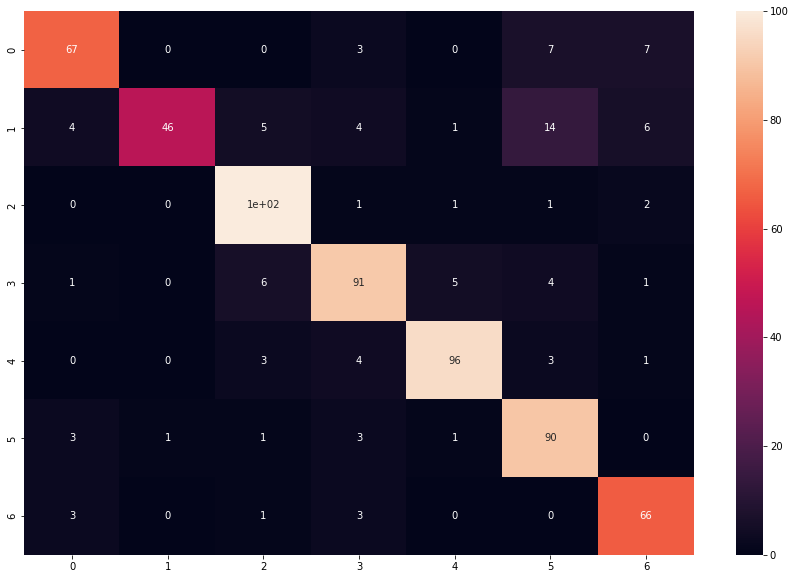

In [ ]:
# Confusion Matrix 
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True)
plt.show() 

In [ ]:
# Model testing with test dataset 
def text_data_preprocessing_and_model_predicting(x_test, y_test, model_mnb): 
  X = x_test 
  y = y_test   
  
  # Predicting with model 
  y_pred = model_mnb.predict(X)
  ac_test = accuracy_score(y, y_pred) 
  print("Accuracy score of test dataset is :{}".format(ac_test)) 

In [ ]:
# calling the function 
text_data_preprocessing_and_model_predicting(x_test, y_test, model_mnb)

Accuracy score of test dataset is :0.841091492776886


# 7.2 Using Pipeline and Multimodels/Multialgorithms

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")

# Taking sample of the train and test dataset 
train, unnecessary_train = train_test_split(train, test_size=.7, stratify=train['category']) 
test, unnecessary_test = train_test_split(test, test_size=.7, stratify=test['category']) 

# Joining train and test dataset 
data = pd.concat([train, test], axis=0, ignore_index=True) 

# resetting index
data = data.sample(frac=1).reset_index(drop=True) 

print("Shape of data is :{}".format(data.shape)) 
data.head()

Shape of data is :(13115, 2)


,text,category
0,চিকিৎসা এখনো শেষ হয়নি অসুস্থ বছরের বৃদ্ধ বাবা ...,state
1,চট্টগ্রাম কলেজে ছাত্রলীগের পক্ষের গোলাগুলি সং...,state
2,উপকূলীয় অঞ্চলের আট পৌরসভার অবকাঠামো উন্নয়নে লা...,economy
3,দর্শকেরা রীতিমতো দম বন্ধ শেষ ভারতের রানের জয়ে ...,sports
4,আইপিএলে দিয়ে দুবার ডাক মারলেন বিরাট কোহলি প্রথ...,sports


In [ ]:
# Feature and label data 
X = data['text'] 
y = data['category'] 

In [ ]:
# Label Encoder
le = LabelEncoder() 
y = le.fit_transform(y) 

In [ ]:
# Dividing dataset 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y)
print("Shape of x_train is :{} \nShape of x_test is :{} \nShape of y_train is :{} \nShape of y_test is :{}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape)) 


Shape of x_train is :(11803,) 
Shape of x_test is :(1312,) 
Shape of y_train is :(11803,) 
Shape of y_test is :(1312,)


In [ ]:
# Count vectorizer 
count_vectorizer = CountVectorizer() 
X_train_count = count_vectorizer.fit_transform(X).toarray() 
X_train_count.shape 

(13115, 28042)

In [ ]:
# TfidfVectorizer 
tfidf_transformer = TfidfTransformer() 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count) 
X_train_tfidf.shape 

(13115, 28042)

In [ ]:
# MultinomialNB 
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# All of the above algorithms in 1 pipeline using MultinomialNB
text_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_pipeline = text_pipeline.fit(x_train, y_train) 

In [ ]:
# Testing with test dataset 
def predict_with_test_data_mnb(x_test, y_test, text_pipeline): 

    y_predict = text_pipeline.predict(x_test) 
    acc = np.mean(y_test == y_predict)
    print("The accuracy of the test dataset is :{}".format(acc)) 

predict_with_test_data_mnb(x_test, y_test, text_pipeline) 

The accuracy of the test dataset is :0.7942073170731707


In [ ]:
# All of the above algorithms in 1 pipeline using SGDClassifier
text_pipeline2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])
text_pipeline2 = text_pipeline2.fit(x_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
def predict_with_test_data_svm(x_test, y_test, text_pipeline2):  

    y_predict = text_pipeline2.predict(x_test) 
    acc = np.mean(y_test == y_predict)  
    print("The accuracy of the test dataset is :{}".format(acc)) 

predict_with_test_data_svm(x_test, y_test, text_pipeline2) 

The accuracy of the test dataset is :0.8551829268292683


In [ ]:
# Using GridSearchCV for 1st pipeline 
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

gscv = GridSearchCV(text_pipeline, parameters, n_jobs=-1) 
gscv = gscv.fit(x_train, y_train) 

In [ ]:
gscv.best_score_

0.8941792475179291

In [ ]:
gscv.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
# Using GridSearchCV for 2nd pipeline 
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gscv2 = GridSearchCV(text_pipeline2, parameters, n_jobs=-1) 
gscv2 = gscv2.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
gscv2.best_score_

0.8748629207675576

In [ ]:
gscv2.best_params_ 

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

# 8 Text Classification Using GRU of Deep Learning

In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, GRU, GlobalAveragePooling1D, LayerNormalization, Dense, Dropout 
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model


In [120]:
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")

# Taking sample of the train and test dataset 
train, unnecessary_train = train_test_split(train, test_size=.7, stratify=train['category']) 
test, unnecessary_test = train_test_split(test, test_size=.7, stratify=test['category']) 

# Joining train and test dataset 
data = pd.concat([train, test], axis=0, ignore_index=True) 

# resetting index
data = data.sample(frac=1).reset_index(drop=True) 

print("Shape of data is :{}".format(data.shape)) 
data.head() 

Shape of data is :(13115, 2)


,text,category
0,মালয়েশিয়ায় শুটিং হঠাৎ​ অসুস্থ হয়ে দেশে ফিরে​ছি...,entertainment
1,বাংলাদেশ বছর চীনকে ছাড়িয়ে বিশ্বের সর্বোচ্চ তুল...,economy
2,যুক্তরাষ্ট্রের পররাষ্ট্রমন্ত্রী কেরি ইউরোপীয় ই...,international
3,পাকিস্তানি সেনাবাহিনীর অভিযান শুরুর সপ্তাহ ওয়া...,international
4,ফার্স্ট অ্যান্ড ফিউরিয়াস সিরিজের সপ্তম ছবি ফিউ...,entertainment


In [121]:
# Feature and label data
X = data['text'] 
y = data['category']  


In [122]:
# encoding 
le = LabelEncoder() 
y = le.fit_transform(y) 

In [123]:
# One Hot Encoding 
ohe = OneHotEncoder(sparse=False) 
y = y.reshape(y.shape[0], 1) 
y = ohe.fit_transform(y) 
y.shape

(13115, 7)

In [124]:
# Dividing dataset 
train_x, x_valid, train_y, y_valid = train_test_split(X, y, test_size=.05, random_state=42, stratify=y)
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, stratify=train_y) 
print("Shape of x_train is :{} \nShape of x_valid is :{} \nShape of x_test is :{} \nShape of y_train is :{} \nShape of y_valid is :{}\nShaep of y_test is :{}".format(x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)) 


Shape of x_train is :(11213,) 
Shape of x_valid is :(656,) 
Shape of x_test is :(1246,) 
Shape of y_train is :(11213, 7) 
Shape of y_valid is :(656, 7)
Shaep of y_test is :(1246, 7)


In [125]:
# some variables 
embed_size = 300
max_features = 80000 
max_len = 250

In [126]:
# Taking full text for tokenizer 
full_text = list(x_train) + list(x_valid) + list(x_test) 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(full_text)

In [127]:
# Tokenizing
x_train = tokenizer.texts_to_sequences(x_train)
x_valid = tokenizer.texts_to_sequences(x_valid)
x_test = tokenizer.texts_to_sequences(x_test) 

# Pad sequences 
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_valid = pad_sequences(x_valid, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [128]:
# Model Building 
input = Input(shape=(max_len,))
x = Embedding(max_features, embed_size)(input)
x = Bidirectional(GRU(32, return_sequences=True))(x)
x = GlobalAveragePooling1D()(x)
x = LayerNormalization()(x)
x = Dropout(.4)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='sigmoid')(x)

model = Model(inputs=input, outputs=x)

In [129]:
# summary of the model 
model.summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 250, 300)          24000000  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 250, 64)           64128     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
layer_normalization_2 (Layer (None, 64)                128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1040

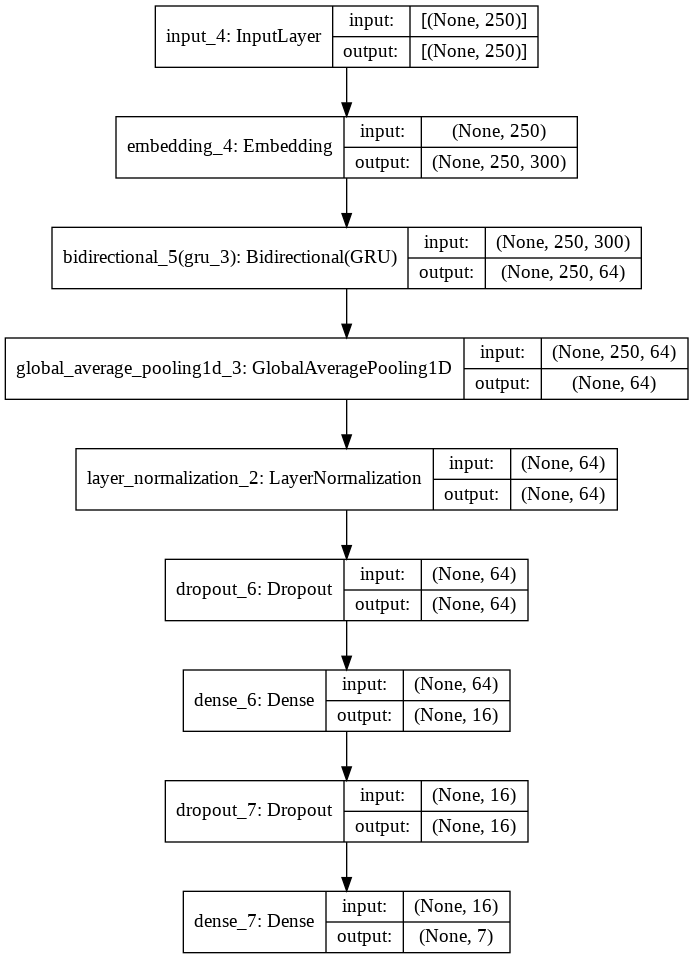

In [130]:
#plotting model 
plot_model(model, show_shapes=True, to_file = '/content/drive/MyDrive/technometrics/Bengali_text_classification.png')

In [131]:
# Compile Model 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [132]:
# Define ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoints = ModelCheckpoint('/content/drive/MyDrive/technometrics/weight.hdf5',
                               monitor='val_loss',
                               mode='max', 
                               verbose=True,
                               save_best_only=True) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              min_lr=0.000001) 

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3) 

In [133]:
# Model Training 
history = model.fit(x_train, y_train, 
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_valid, y_valid),
                    callbacks = [checkpoints, reduce_lr, early_stop]) 

Epoch 1/20
22/22 [==============================] - 8s 211ms/step - loss: 1.8464 - accuracy: 0.2337 - val_loss: 1.4658 - val_accuracy: 0.6159

Epoch 00001: val_loss improved from -inf to 1.46579, saving model to /content/drive/MyDrive/technometrics/weight.hdf5
Epoch 2/20
22/22 [==============================] - 4s 172ms/step - loss: 1.3104 - accuracy: 0.4768 - val_loss: 0.8438 - val_accuracy: 0.7820

Epoch 00002: val_loss did not improve from 1.46579
Epoch 3/20
22/22 [==============================] - 4s 168ms/step - loss: 0.9065 - accuracy: 0.6642 - val_loss: 0.5270 - val_accuracy: 0.9009

Epoch 00003: val_loss did not improve from 1.46579
Epoch 4/20
22/22 [==============================] - 4s 171ms/step - loss: 0.6371 - accuracy: 0.7715 - val_loss: 0.3703 - val_accuracy: 0.9131

Epoch 00004: val_loss did not improve from 1.46579
Epoch 5/20
22/22 [==============================] - 4s 172ms/step - loss: 0.4797 - accuracy: 0.8314 - val_loss: 0.3308 - val_accuracy: 0.9177

Epoch 00005: v

In [134]:
# Model Evaluation 
print("Loss of the model is {}".format(model.evaluate(x_valid, y_valid)[0]) )
print("Accuracy of the model is {}%".format(model.evaluate(x_valid, y_valid)[1]*100 ))

21/21 [==============================] - 1s 40ms/step - loss: 0.3555 - accuracy: 0.9162
Loss of the model is 0.3554506003856659
21/21 [==============================] - 1s 40ms/step - loss: 0.3555 - accuracy: 0.9162
Accuracy of the model is 91.61585569381714%


8


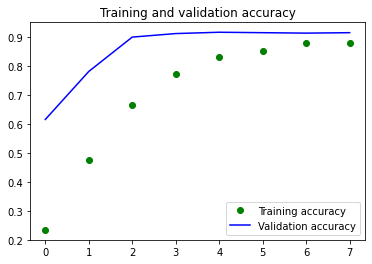

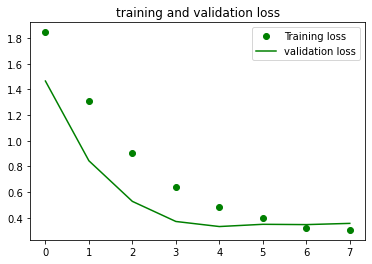

In [135]:
# Accuracy and Loss Graph of Train and Valid datset 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(len(accuracy))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure() 
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [136]:
# Model Saving and Loading 
model.save('/content/drive/MyDrive/technometrics/Bangla_MultiClass_text_Classification_GRU.h5') 

# Loading full model 
model_loaded = load_model('/content/drive/MyDrive/technometrics/Bangla_MultiClass_text_Classification_GRU.h5')

In [137]:
# Predicting with test dataset 
def predict_with_test_dataset(x_test, y_test, model_loaded): 
  y_pred = model_loaded.predict(x_test) 
  y_pred = np.rint(y_pred) 
  #print(y_pred)
  return y_pred 

y_pred = predict_with_test_dataset(x_test, y_test, model_loaded) 
y_pred 

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], dtype=float32)

In [138]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [139]:
# Reverse of one hot encoding 
y_pred = ohe.inverse_transform(y_pred) 
y_pred = y_pred.flatten() 
y_test = ohe.inverse_transform(y_test) 
y_test = y_test.flatten() 

In [140]:
y_test

array([5, 5, 5, ..., 2, 4, 5])

In [141]:
y_pred 

array([5, 5, 1, ..., 1, 1, 1])

In [142]:
# Classification Report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       159
           1       0.18      0.96      0.30       151
           2       0.80      0.02      0.04       201
           3       0.15      0.02      0.03       206
           4       1.00      0.01      0.03       203
           5       0.96      0.45      0.61       188
           6       0.97      0.75      0.85       138

    accuracy                           0.40      1246
   macro avg       0.69      0.45      0.39      1246
weighted avg       0.69      0.40      0.35      1246



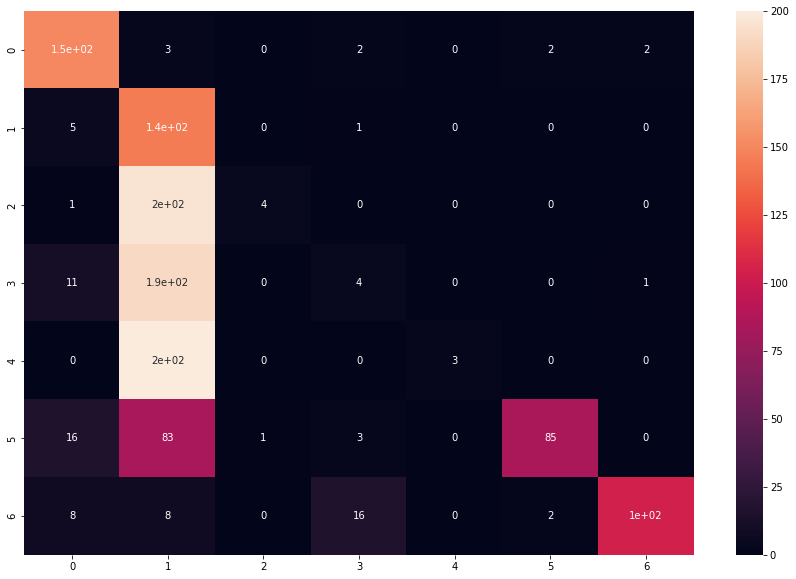

In [143]:
# Confusion Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# 9 Text Classification Using LSTM of Deep Learning

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
# from tensorflow.keras.callbacks import , EarlyStopping
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.regularizers import l2

In [4]:
# Reading train and test dataset 
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv") 
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")

# Taking sample of the train and test dataset 
train, unnecessary_train = train_test_split(train, test_size=.7, stratify=train['category']) 
test, unnecessary_test = train_test_split(test, test_size=.7, stratify=test['category']) 

# Joining train and test dataset 
data = pd.concat([train, test], axis=0, ignore_index=True) 

# resetting index
data = data.sample(frac=1).reset_index(drop=True) 

print("Shape of data is :{}".format(data.shape)) 
data.head() 

Shape of data is :(13115, 2)


,text,category
0,নভেম্বর পর্দা পড়ে কলকাতার আন্তর্জাতিক চলচ্চিত্...,entertainment
1,সিরাজগঞ্জের কাজীপুরের মেঘাই এলাকায় যমুনা নদীর...,state
2,কিছুদিন চিত্রনায়িকা পপি চুক্তিবদ্ধ হয়েছিলেন চল...,entertainment
3,ইসলামের নামে সন্ত্রাস জঙ্গিবাদ আতঙ্ক সৃষ্টি হা...,state
4,মালয়েশিয়া এয়ারলাইনসের এমএইচ নম্বর ফ্লাইটটি নিখ...,international


In [5]:
# Feature and label 
X = data['text'] 
y = data['category'] 

In [6]:
# Label Encoder
le = LabelEncoder()
y = le.fit_transform(y) 

In [7]:
# One-hot-encoding 
ohe = OneHotEncoder(sparse=False) 
y = y.reshape((y.shape[0], 1)) 
y = ohe.fit_transform(y)  

In [8]:
# Dividing dataset
train_x, x_valid, train_y, y_valid = train_test_split(X, y, test_size=.05, random_state=42, stratify=y)
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, stratify=train_y) 
print("Shape of x_train is :{} \nShape of x_valid is :{} \nShape of x_test is :{} \nShape of y_train is :{} \nShape of y_valid is :{}\nShaep of y_test is :{}".format(x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)) 


Shape of x_train is :(11213,) 
Shape of x_valid is :(656,) 
Shape of x_test is :(1246,) 
Shape of y_train is :(11213, 7) 
Shape of y_valid is :(656, 7)
Shaep of y_test is :(1246, 7)


In [9]:
# some variable 
embed_size = 300
max_features = 120000 
max_len = 400 

In [10]:
# Taking full feature data 
full_text = list(x_train) + list(x_valid) + list(x_test) 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(full_text) 

In [11]:
# Tokenizing
x_train = tokenizer.texts_to_sequences(x_train)
x_valid = tokenizer.texts_to_sequences(x_valid)
x_test = tokenizer.texts_to_sequences(x_test) 

# Pad sequences 
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_valid = pad_sequences(x_valid, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [12]:
# Vocabulary 
vocab_size = len(tokenizer.word_index) + 1 
vocab_size 

202677

In [13]:
# Pad Sequence 
# max_len = 300 
# X_pad = pad_sequences(x_token, padding='post', maxlen=max_len) 

In [14]:
# Building Model 
embedding_dim = 32

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128))) 
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

In [15]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 32)           6485664   
_________________________________________________________________
bidirectional (Bidirectional (None, 400, 256)          164864    
_________________________________________________________________
dropout (Dropout)            (None, 400, 256)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 1799      
Total params: 7,046,567
Trainable params: 7,046,567
Non-trainable params: 0
______________________________________________

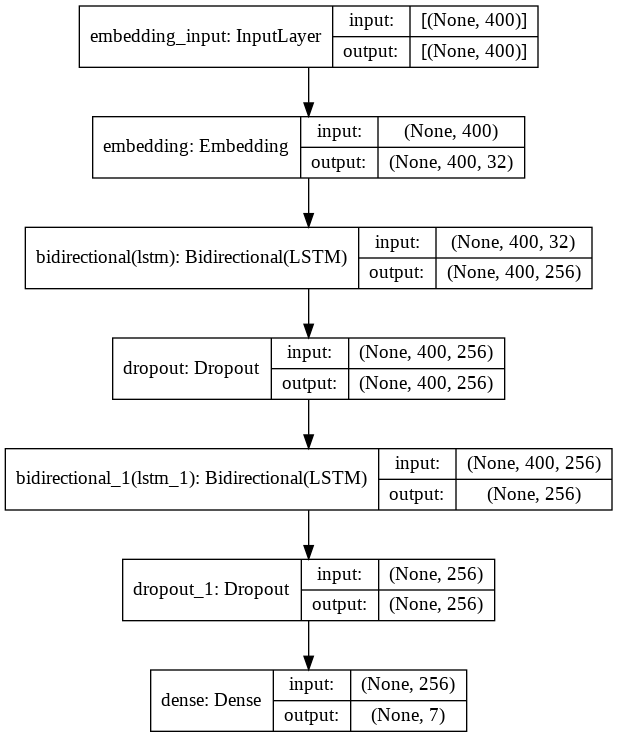

In [16]:
#Plotting Model
plot_model(model, show_shapes=True, to_file = 'Bengali_Sentiment_model.png')

In [17]:
# Compile Model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Define ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoints = ModelCheckpoint('/content/drive/MyDrive/technometrics/weight_LSTM.hdf5',
                               monitor='val_loss',
                               mode='max', 
                               verbose=True,
                               save_best_only=True) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              min_lr=0.000001) 

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3) 

In [21]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    verbose=1, 
                    validation_data=(x_valid, y_valid),  
                    batch_size=256,
                    callbacks = [checkpoints, reduce_lr, early_stop]
                    )

Epoch 1/30
44/44 [==============================] - 37s 574ms/step - loss: 1.7295 - accuracy: 0.2738 - val_loss: 1.3763 - val_accuracy: 0.4832

Epoch 00001: val_loss improved from -inf to 1.37625, saving model to /content/drive/MyDrive/technometrics/weight_LSTM.hdf5
Epoch 2/30
44/44 [==============================] - 24s 539ms/step - loss: 0.9440 - accuracy: 0.6264 - val_loss: 0.7736 - val_accuracy: 0.7195

Epoch 00002: val_loss did not improve from 1.37625
Epoch 3/30
44/44 [==============================] - 24s 539ms/step - loss: 0.4135 - accuracy: 0.8528 - val_loss: 0.5168 - val_accuracy: 0.8506

Epoch 00003: val_loss did not improve from 1.37625
Epoch 4/30
44/44 [==============================] - 24s 540ms/step - loss: 0.1609 - accuracy: 0.9567 - val_loss: 0.5664 - val_accuracy: 0.8430

Epoch 00004: val_loss did not improve from 1.37625
Epoch 5/30
44/44 [==============================] - 24s 538ms/step - loss: 0.0798 - accuracy: 0.9823 - val_loss: 0.5659 - val_accuracy: 0.8399

Epoc

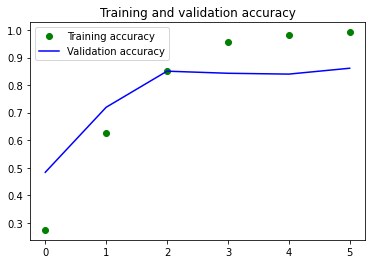

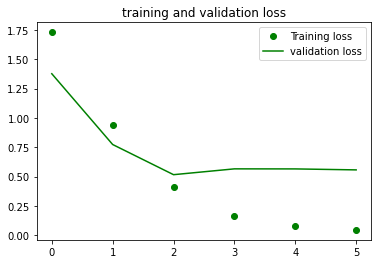

In [23]:
# Printing accuracy and loss of train and validation data 
train_accuracy = history.history['accuracy'] 
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, train_accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [24]:
# Save model 
model.save("/content/drive/MyDrive/technometrics/Bengali_text_classification_using_LSTM.h5")

# Load Model
model_loaded = load_model("/content/drive/MyDrive/technometrics/Bengali_text_classification_using_LSTM.h5") 

In [38]:
# Predict with test data 
def test_data_preprocessing_and_predict_with_model(X_test, model):  

  # Predicting with test dataset 
  pred_class = model.predict(x_test)  
  return pred_class 

In [39]:
y_pred = test_data_preprocessing_and_predict_with_model(x_test, model_loaded) 
y_pred = np.rint(y_pred)
y_pred 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
# Classification Report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       159
           1       0.96      0.83      0.89       151
           2       0.90      0.96      0.93       201
           3       0.86      0.85      0.86       206
           4       0.96      0.99      0.97       203
           5       0.79      0.78      0.78       188
           6       0.76      0.76      0.76       138

   micro avg       0.88      0.87      0.87      1246
   macro avg       0.88      0.86      0.87      1246
weighted avg       0.88      0.87      0.87      1246
 samples avg       0.87      0.87      0.87      1246



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Reverse of one hot encoding 
y_pred = ohe.inverse_transform(y_pred) 
y_pred = y_pred.flatten()
y_test = ohe.inverse_transform(y_test) 
y_test = y_test.flatten() 


Text(56.760000000000005, 0.5, 'Predicted data')

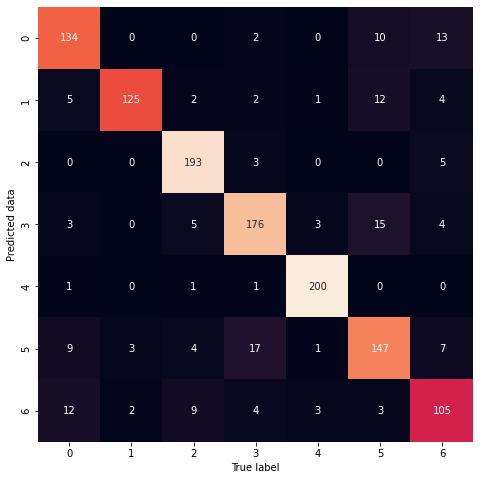

In [73]:
# Confusion Matrix 
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('True label')
plt.ylabel('Predicted data')

# 10 Text Classification Using Bengali BERT pretrained Model 

In [ ]:
pip install transformers

In [5]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import metrics 

import re, os 
from tqdm import tqdm 

from transformers import BertConfig, BertModel 
import transformers 
import torch 
import torch.nn as nn 
from transformers import AdamW 
from transformers import get_linear_schedule_with_warmup 

### 10.1 Reading and Preprocessing of the dataset 

In [12]:
# Reading train and test dataset 
train = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/technometrics/sample dataset/test.csv")

# joining the train and test dataset 
train_test = pd.concat([train, test], axis=0, ignore_index=True)

# resetting index
train_test = train_test.sample(frac=1).reset_index(drop=True)

# Label Encoding 
le = LabelEncoder() 
train_test['category'] = le.fit_transform(train_test['category'])

# Dividing train_test dataset into train and test 
train, test = train_test_split(train_test, test_size=.2, stratify=train_test['category'])  

# resetting index
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

# Reading training dataset 
df = train
print("Sahep of df is :", df.shape) 
df.head() 

Sahep of df is : (34976, 2)


,text,category
0,বগুড়ার দুপচাঁচিয়ায় পরিত্যক্ত চাতাল গত রোববার স...,5
1,নারীর নিরাপত্তায় কলকাতার রাস্তায় নেমেছে পুলিশে...,3
2,রণবীর কাপুরের জন্মদিন বছর দিনটি আলিয়া ভাটের আন...,2
3,দেশের রপ্তানি প্রক্রিয়াকরণ এলাকাগুলোতে ইপিজেড...,0
4, মোহাম্মদ আক্তার উজ জামান প্রভাষক রূপনগর মডেল...,1


### 10.2 Create Folds

In [ ]:
df = df.copy() 
#df = df.dropna().reset_index(drop=True) 
df["kfold"] = -1

df = df.sample(frac=1).reset_index(drop=True)

kf = StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df, y=df.category.values)):
    print(len(trn_), len(val_))
    df.loc[val_, 'kfold'] = fold

df.to_csv("/content/drive/MyDrive/technometrics/sample dataset/train_folds.csv", index=False)

17483 4371
17483 4371
17483 4371
17483 4371
17484 4370


### 10.3 Some Global Variable

In [20]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
MAX_LEN = 64 
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 10
BERT_PATH = "sagorsarker/bangla-bert-base"
MODEL_PATH = "/content/drive/MyDrive/technometrics/model.bin"
TRAINING_FILE = "/content/drive/MyDrive/technometrics/sample dataset/train_folds.csv"
TOKENIZER = transformers.BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

### 10.4 Model

In [21]:
class BERTBaseUncased(nn.Module):
    def __init__(self):
        super(BERTBaseUncased, self).__init__()
        self.bert = transformers.BertModel.from_pretrained(BERT_PATH, return_dict=False)
        self.bert_drop = nn.Dropout(0.3)
        self.out = nn.Linear(768, 7)

    def forward(self, ids, mask, token_type_ids):
        _, o2 = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids)
        bo = self.bert_drop(o2)
        output = self.out(bo)
        return output


In [22]:
model = BERTBaseUncased()

Downloading:   0%|          | 0.00/630M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 10.5 Dataset

In [23]:
class BERTDataset:
    def __init__(self, content, label):
        self.review = content
        self.target = label 
        self.tokenizer = TOKENIZER
        self.max_len = MAX_LEN

    def __len__(self):
        return len(self.review)

    def __getitem__(self, item):
        review = str(self.review[item])
        review = " ".join(review.split())

        inputs = self.tokenizer.encode_plus(
            review,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            pad_to_max_length=True,
        )

        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
            "targets": torch.tensor(self.target[item], dtype=torch.long)
        } 

### 10.6 Early Stopping

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0 
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

### 10.7 Engine 

In [24]:
#def loss_fn(outputs, targets):
#    return nn.CrossEntropyLoss(outputs, targets) 
criterion = nn.CrossEntropyLoss() 


def train_fn(data_loader, model, optimizer, device, scheduler):
    model.train()

    for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
        ids = d["ids"]
        token_type_ids = d["token_type_ids"]
        mask = d["mask"]
        targets = d["targets"]

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.long)


        optimizer.zero_grad()
        outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)

        loss = criterion(outputs, targets)       #loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()


def eval_fn(data_loader, model, device):
    model.eval()
    fin_targets = []
    fin_outputs = []

    with torch.no_grad():

        for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
            ids = d["ids"]
            token_type_ids = d["token_type_ids"]
            mask = d["mask"]
            targets = d["targets"]

            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.long)

            outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return fin_outputs, fin_targets

### 10.8 Training the Model 

In [ ]:
def run(fold):
    dfx = pd.read_csv(TRAINING_FILE)

    df_train = dfx[dfx.kfold != fold].reset_index(drop=True)
    df_valid = dfx[dfx.kfold == fold].reset_index(drop=True)

    # Loading train dataset 
    train_dataset = BERTDataset(
        content = df_train.text.values,
        label = df_train.category.values
    )

    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=TRAIN_BATCH_SIZE, 
        num_workers=4 
    )

    # Loading valid dataset 
    valid_dataset = BERTDataset(
        content = df_valid.text.values,
        label = df_valid.category.values 
    )

    valid_data_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size = VALID_BATCH_SIZE,
        num_workers = 2
    ) 

    # Define device, model 
    device = torch.device(DEVICE)
    model = BERTBaseUncased()
    model.to(device)

    # optimizer and hyperparameter tuning 
    param_optimizer = list(model.named_parameters())
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
    optimizer_parameters = [
        {
            "params": [
                p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
            ],
            "weight_decay": 0.001,
        },
        {
            "params": [
                p for n, p in param_optimizer if any(nd in n for nd in no_decay)
            ],
            "weight_decay": 0.0,
        },
    ]

    num_train_steps = int(len(df_train) / TRAIN_BATCH_SIZE * EPOCHS)
    optimizer = AdamW(optimizer_parameters, lr=3e-5)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=0, num_training_steps=num_train_steps
    )

    #es = EarlyStopping(patience=5, mode="max") 

    best_accuracy = 0
    for epoch in range(EPOCHS):
      train_fn(train_data_loader, model, optimizer, device, scheduler)
      outputs, targets = eval_fn(valid_data_loader, model, device)
      
      #outputs = np.array(outputs) >= 0.5
      #accuracy = metrics.accuracy_score(targets, outputs)
      #print(f"Valid Accuracy Score = {accuracy}") 
      #if accuracy > best_accuracy:
      torch.save(model.state_dict(), MODEL_PATH)
            #best_accuracy = accuracy

In [ ]:
for i in range(5): 
  run(i) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g

### 10.9 Loading Saved Model

In [ ]:
model_saved = BERTBaseUncased() 
model_saved.load_state_dict(torch.load(MODEL_PATH)) 
model_saved.eval() 

### 10.10 Testing with test dataset 

In [56]:
def predict_with_test_dataset(test, model):
    # Reading test dataset  
    df_test = test.copy()  
    print(df_test.info())

    test_dataset = BERTDataset(
        content = df_test.text.values,
        label = df_test.category.values
    )

    test_data_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=TRAIN_BATCH_SIZE, 
        num_workers=4 
    )

    # Define device 
    device = torch.device(DEVICE)

    # Calling eval_fn for evaluation 
    outputs, targets = eval_fn(test_data_loader, model, device) 

    # Accuracy score 
    #outputs = np.array(outputs) >= 0.5
    #accuracy = metrics.accuracy_score(targets, outputs)
    #print(f"Test Accuracy Score = {accuracy}") 
    return outputs, targets


In [ ]:
outputs, targets = predict_with_test_dataset(model_saved)

# 11 Text Classification Using Spark NLP 

In [3]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash 

--2021-10-20 05:39:35--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-10-20 05:39:35--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-10-20 05:39:35--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns 

import sparknlp
spark = sparknlp.start()
from sparknlp.pretrained import PretrainedPipeline
from pyspark.ml import Pipeline

from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

from pyspark.sql.types import StringType
from sklearn.metrics import classification_report, confusion_matrix

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 3.3.1
Apache Spark version: 3.0.3


### 11.1 Reading Train and Test dataset 

In [18]:
train_dataset = spark.read.option('header', True).csv('/content/drive/MyDrive/technometrics/sample dataset/train.csv')
train_dataset.show() 

+--------------------+-------------+
|                text|     category|
+--------------------+-------------+
|কিশোরগঞ্জ সদর উপজ...|        state|
|অনলাইনে পণ্য বেচা...|      economy|
|কমার কোনো লক্ষণ...|entertainment|
|সেগুনবাগিচার কেন্...|entertainment|
|কদমতলী থানা আওয়াম...|        state|
|আবাসিক এলাকা সফটও...|   technology|
|রোমান্সের রাজা বল...|entertainment|
|সারো ব্র্যায়ারলির...|entertainment|
|আবারও জাহাঙ্গীরনগ...|    education|
|মার্কিন জাতীয় নির...|international|
|রপ্তানি মাছে ফরমা...|      economy|
|ক্যাথরিন মায়োরগার...|       sports|
|যশোরে ছাত্রলীগের...|        state|
|রাজধানীর কটি বিপণ...|        state|
|জাহাজ নির্মাণশিল্...|      economy|
|সালে বাজারে আসা ট...|   technology|
|প্রায়ই শুনি অমুক ...|entertainment|
|ভারতের দিল্লির মু...|international|
|জন্মদিন উৎযাপন কর...|entertainment|
|ভাঁজ স্মার্টফোনের...|   technology|
+--------------------+-------------+
only showing top 20 rows



In [19]:
train_dataset.count() 

21923

In [20]:
test_dataset = spark.read.option('header', True).csv('/content/drive/MyDrive/technometrics/sample dataset/test.csv')
test_dataset.show() 

+--------------------+-------------+
|                text|     category|
+--------------------+-------------+
|ভারতের প্রধানমন্ত...|international|
|জগন্নাথ বিশ্ববিদ্...|    education|
|নির্বাচনকালীন সরক...|        state|
|ফ্যাশন সাময়িকী ভো...|entertainment|
|ইন্টারনেটে ডোমেইন...|   technology|
|বলাকাজান্নাতসকাল ...|entertainment|
|প্রযুক্তি গবেষকের...|   technology|
|বাতির নিচে স্মার্...|   technology|
|ইজারার শর্ত ভঙ্গ ...|        state|
|ঈদে সালমান খানের ...|entertainment|
|কুছ কুছ হোতা হ্যা...|entertainment|
|মাতৃ শিশুস্বাস্থে...|        state|
|পাকিস্তানের এলাকা...|international|
|গানে কবিতায় নৃত্য...|entertainment|
|নারীই সুন্দর কখনে...|international|
|আগস্ট আলোর পাতায় ...|      economy|
|রুশ প্রেসিডেন্ট ভ...|international|
|ডেট রিকভারি কোম্প...|      economy|
|চলতি বছরে লক্ষ্মী...|      economy|
|বার্সেলোনার মূল দ...|       sports|
+--------------------+-------------+
only showing top 20 rows



In [21]:
test_dataset.count() 

21797

### 11.2 Define Pipeline

In [23]:
# # actual content is inside description column
# document = DocumentAssembler()\
#     .setInputCol("text")\
#     .setOutputCol("document")

# # use = UniversalSentenceEncoder.pretrained() \
# #  .setInputCols(["document"])\
# #  .setOutputCol("sentence_embeddings")

# tokenizer = Tokenizer()\
#   .setInputCols(['document'])\
#   .setOutputCol('token') 

# normalizer = Normalizer()\
#   .setInputCols(['token'])\
#   .setOutputCol('normalized') 

# # # embedding for bengali language 
# # embeddings = WordEmbeddingsModel.pretrained("bengali_cc_300d", "bn") \
# #   .setInputCols(["document", "normalized"])\
# #   .setOutputCol("embeddings") 

# word_embeddings = WordEmbeddingsModel().pretrained()\
#   .setInputCols(['document', 'normalized'])\
#   .setOutputCol("embeddings")

# embeddingSentence = SentenceEmbeddings()\
#   .setInputCols(['document', 'embeddings'])\
#   .setOutputCol("sentence_embeddings")\
#   .setPoolingStrategy("AVERAGE") 



# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained() \
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
  .setInputCols(["sentence_embeddings"])\
  .setOutputCol("class")\
  .setLabelColumn("category")\
  .setMaxEpochs(10)\
  .setEnableOutputLogs(True)


pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [24]:
# Training with defined pipeline 
pipelineModel = pipeline.fit(train_dataset) 

### 11.3 Evaluation 

In [27]:
preds = pipelineModel.transform(test_dataset)

In [28]:
preds.select('category','text',"class.result").show(50, truncate=50)

+-------------+--------------------------------------------------+---------------+
|     category|                                              text|         result|
+-------------+--------------------------------------------------+---------------+
|international|ভারতের প্রধানমন্ত্রী নরেন্দ্র মোদির নামে নির্ম...|        [state]|
|    education|জগন্নাথ বিশ্ববিদ্যালয় জবি কুমিল্লা পরীক্ষামূলকভ...|[entertainment]|
|        state|নির্বাচনকালীন সরকারব্যবস্থা আলোচনার বিরোধীদলীয়...|[international]|
|entertainment|ফ্যাশন সাময়িকী ভোগএর সেপ্টেম্বর সংখ্যার প্রচ্ছদ...|[entertainment]|
|   technology|ইন্টারনেটে ডোমেইন নাম অন্তর্ভুক্ত হয়েছে সালের শ...|        [state]|
|entertainment|বলাকাজান্নাতসকাল সাড়ে টা দুপুর সাড়ে টা বেলা সাড়...|    [education]|
|   technology|প্রযুক্তি গবেষকেরা বলছেন এতদিন কেবল কল্পনা শিগগ...|[international]|
|   technology|বাতির নিচে স্মার্টফোন গেলেই ইন্টারনেট সংযোগ পায়...|      [economy]|
|        state|ইজারার শর্ত ভঙ্গ বরিশালের আগৈলঝাড়া উপজেলা সদরে...|[entertainment]|
|ent

In [29]:
preds.select('category','text',"class.metadata").show(50, truncate=50)

+-------------+--------------------------------------------------+--------------------------------------------------+
|     category|                                              text|                                          metadata|
+-------------+--------------------------------------------------+--------------------------------------------------+
|international|ভারতের প্রধানমন্ত্রী নরেন্দ্র মোদির নামে নির্ম...|[[economy -> 0.06481883, state -> 0.5641876, sp...|
|    education|জগন্নাথ বিশ্ববিদ্যালয় জবি কুমিল্লা পরীক্ষামূলকভ...|[[economy -> 0.0011823231, state -> 0.001354111...|
|        state|নির্বাচনকালীন সরকারব্যবস্থা আলোচনার বিরোধীদলীয়...|[[economy -> 0.00876482, state -> 0.1050342, sp...|
|entertainment|ফ্যাশন সাময়িকী ভোগএর সেপ্টেম্বর সংখ্যার প্রচ্ছদ...|[[economy -> 0.03326492, state -> 0.04085691, s...|
|   technology|ইন্টারনেটে ডোমেইন নাম অন্তর্ভুক্ত হয়েছে সালের শ...|[[economy -> 0.19081925, state -> 0.5908084, sp...|
|entertainment|বলাকাজান্নাতসকাল সাড়ে টা দুপুর সাড়ে টা বে

In [30]:
preds_df = preds.select('category','text',"class.result").toPandas()

In [31]:
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

In [32]:
print (classification_report(preds_df['result'], preds_df['category']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      economy       0.42      0.42      0.42      2816
    education       0.36      0.77      0.49      1230
entertainment       0.66      0.32      0.43      7258
international       0.30      0.29      0.30      3678
       sports       0.62      0.47      0.53      4683
        state       0.19      0.30      0.24      2132
   technology       0.00      0.00      0.00         0

     accuracy                           0.38     21797
    macro avg       0.37      0.37      0.34     21797
 weighted avg       0.50      0.38      0.41     21797



Text(56.760000000000005, 0.5, 'Predicted data')

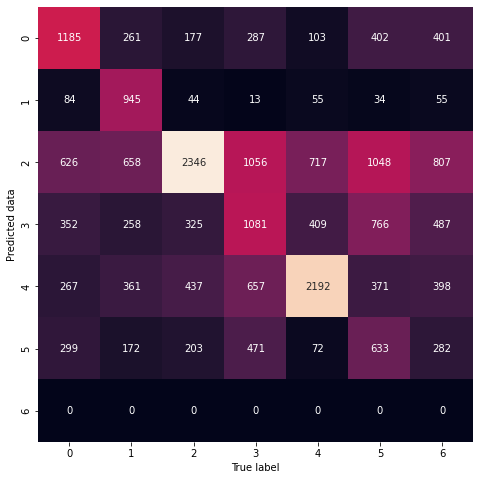

In [37]:
# Confusion Matrix 
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(preds_df['result'], preds_df['category']), square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('True label')
plt.ylabel('Predicted data')

### 11.4 Save and Load pre-trained ClassifierDL Model

In [38]:
pipelineModel.stages[-1].write().overwrite().save("/content/drive/MyDrive/technometrics/tmp_classifierDL_model")

In [39]:
# In a new pipeline you can load it for prediction
document = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained() \
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

classsifierdl = ClassifierDLModel.load("/content/drive/MyDrive/technometrics/tmp_classifierDL_model") \
  .setInputCols(["sentence_embeddings"])\
  .setOutputCol("class")

pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [40]:
dfTest = spark.createDataFrame([
    "দুটি ইতিহাসের শেষ লাইন লেখা হলো তাঁর হাতে। গত অক্টোবরে জেতা ঢাকা টেস্টে ইংল্যান্ডের শেষ উইকেটটি নিয়েছিলেন তিনি। কলম্বোয় শততম টেস্টে জয়ের জয়সূচক দুটি রান এল তাঁর ব্যাট থেকে। টেস্ট জয়ের ক্যানভাসে তুলির শেষ আঁচড়টা দেওয়া যেন এখন মেহেদী হাসান মিরাজেরই কাজ।গতকাল দুপুরে এই মিরাজ দেশে ফিরেছেন টেস্ট দলের আরও দুই সঙ্গী মুমিনুল হক ও তাইজুল ইসলামের সঙ্গে। ওয়ানডে দলে না-থাকা এই ক্রিকেটাররা এখন ব্যস্ত হয়ে যাবেন ইমার্জিং কাপ নিয়ে। এরপর প্রিমিয়ার লিগ। ওয়ানডে দলে না-থাকা পেসার কামরুল ইসলাম অবশ্য ফেরেননি তাঁদের সঙ্গে। তাঁর নববিবাহিতা স্ত্রী দু-তিন দিন হলো কলম্বো গেছেন। নবদম্পতি দেশে ফিরবেন মধুচন্দ্রিমা করে।এক অর্থে ‘মধুচন্দ্রিমা’ চলছে মিরাজ-মুমিনুল-তাইজুলদেরও। জয়ের ঘোরের মধ্যে এখন বসবাস তাঁদের। মিরপুরে মিরাজ যেমন সাংবাদিকদের বলছিলেন, ‘বুঝতেই পারছেন এ রকম একটা দিনের সাক্ষী হয়েছি...খুব ভালো লাগছে। শততম টেস্ট খেলা এবং তাতে জয়ের অনুভূতি অন্য রকম।’ মিরাজের বাড়তি আনন্দ জয়সূচক রানটা তাঁর ব্যাট থেকে এসেছে বলে, ‘শ্রীলঙ্কার মাটিতে এ রকম টেস্ট জয় বাংলাদেশের জন্যই বড় এক অর্জন। তার ওপর আমার ব্যাট থেকে এসেছে শেষ ২ রান, আমার সারা জীবন এটা মনে থাকবে ইংল্যান্ডের বিপক্ষে জেতা টেস্টেও শেষ উইকেটটা আমি পেয়েছিলাম। সে জন্য আরও বেশি ভালো লাগছে।’ঐতিহাসিক এই জয়ের জন্য তরুণ এই ক্রিকেটার আলাদা করে ধন্যবাদ জানিয়েছেন দলের সিনিয়র খেলোয়াড়দের, ‘আমরা সবাই ভালো খেলেছি। তবে বিশেষ করে ধন্যবাদ সিনিয়রদের। সিনিয়ররা যে প্রতিশ্রুতি দিয়েছেন, সেটা রেখেছেন।’শততম টেস্টে জয়ের রোমাঞ্চে এখনো ডুবে আছেন তাইজুল। মুঠোফোনে প্রতিক্রিয়া জানতেই উল্টো প্রশ্ন করলেন, ‘আগে বলুন, আপনার কেমন লেগেছিল তখন?’ বাংলাদেশ দলের কীর্তিতে গোটা দেশই আনন্দে ভাসছে বলার পর নিজের কথা বললেন বাঁহাতি এই স্পিনার, ‘তাহলে বুঝুন, আমার, আমাদের কেমন লাগছে! আমি বাংলাদেশের শততম টেস্টে জয়ী দলে ছিলাম, জীবনের সেরা পাওয়া এটা।’তাইজুল জানালেন, শেষ ইনিংসে ১৯১ রানের লক্ষ্য থাকলেও ড্রেসিংরুমে সবার বিশ্বাস ছিল বাংলাদেশ জিতবে, ‘মাঠের ভেতরে-বাইরে সবাই খুব চনমনে ছিলাম। আমাদের বিশ্বাস ছিল, আমরাই জিতব। দেশের পতাকা ওড়াতে যা কিছু করার দরকার করব।’কলম্বোয় যে বদলে যাওয়া বাংলাদেশকে দেখেছে সবাই, সেটার শুরু আসলে গলেই। গল টেস্টে হারার পর রাতেই নিজেদের মধ্যে আলোচনায় বসেছিলেন খেলোয়াড়েরা। সেখানে কোচ, ম্যানেজার বা অন্য কেউ ছিলেন না। নিজেদের মধ্যে সে আলোচনায় খেলোয়াড়েরা সবাই মনের অর্গল খুলে দেন। জিততে হলে, ভালো খেলতে হলে কী করতে হবে, সে ব্যাপারে সবাই সবার মতামত জানান। মুমিনুলের ধারণা, গলের সেই রাতেই আঁকা হয়ে গিয়েছিল কলম্বোর সাফল্যের চিত্রনাট্য, ‘আমার মনে হয়, প্রথম টেস্টে না হারলে আমরা শততম টেস্টটা জিততাম না। হারের পর ওই রাতে আমাদের মধ্যে যে আলোচনা হয়েছে, সেটা আসলে বাংলাদেশের ক্রিকেটকেই বদলে দিয়েছে।’কিন্তু কী কথা হয়েছিল ক্রিকেটারদের সে সভায়? মুমিনুল বিস্তারিত বলতে চাইবেন না, স্বাভাবিক। তবু যতটুকু বললেন, তাতে সুরটা ধরা যায়, ‘আমাদের কী করা উচিত, এই জিনিসটাই সবাই মিলে আলোচনা করেছি। ভালো খেলার প্রতিজ্ঞা করেছি।’ সতীর্থরা সে প্রতিজ্ঞা পূরণ করতে পারায় শততম টেস্ট না খেলেও কম আনন্দ নয় মুমিনুলের ‘আমার কোনো আক্ষেপ নেই। ম্যাচ জিতেছি, উন্নতির জায়গাগুলো স্পষ্ট হয়েছে, এর চেয়ে বড় পাওয়া আর কিছু নেই।",
    "ফেনী সদর উপজেলার ধলিয়া ইউনিয়নের রাজনগরের মোল্লার তাকিয়া নুরুল-রওনক ডায়াবেটিস স্বাস্থ্যসেবা উপকেন্দ্রে অ্যাম্বুলেন্স দান করেছেন ব্যবসায়ী আ ক ম শাহিদ রেজা। গত ২৮ জুলাই ফেনী ডায়াবেটিক সমিতির কর্মকর্তাদের হাতে আনুষ্ঠানিকভাবে অ্যাম্বুলেন্সের চাবি হস্তান্তর করেন তিনি।ফেনী ডায়াবেটিক সমিতির সহ-সভাপতি ও সদর উপজেলার চেয়ারম্যান আবদুর রহমান এবং যুগ্ন সম্পাদক মীর হোসেন অ্যাম্বুলেন্সের চাবি গ্রহণ করেন।এ সময় উপস্থিত ছিলেন প্রথম আলোর নিজস্ব প্রতিবেদক আবু তাহের, ব্যবসায়ী শওকত রেজা প্রমুখ।বিজ্ঞপ্তি।"
], StringType()).toDF("description")


In [42]:
prediction = pipeline.fit(dfTest).transform(dfTest) 

In [43]:
prediction.select("class.result").show() 

+---------------+
|         result|
+---------------+
|       [sports]|
|[international]|
+---------------+



In [44]:
prediction.select("class.metadata").show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|metadata                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[[economy -> 1.4423276E-4, state -> 2.77761E-4, sports -> 0.98448676, technology -> 8.060942E-7, entertainment -> 0.001418312, education -> 2.172536E-5, international -> 0.01365032, sentence -> 0]]|
|[[economy -> 3.8697183E-4, state -> 0.15789, sports -> 0.044566922, technology -> 3.287882E-6, entertainment -> 0.13664883, education -> 4.689297E-7, international -> 0.66050345, sentence -> 0]]   |
